In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Debernardi et al 2020 data.csv')

In [3]:
df.head()

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.94884,654.282174,1262.000
1,S10,Cohort1,BPTB,81,F,1,NaN,NaN,NaN,0.97266,2.037585,94.46703,209.488250,228.407
2,S100,Cohort2,BPTB,51,M,1,NaN,NaN,7.0,0.78039,0.145589,102.36600,461.141000,NaN
3,S101,Cohort2,BPTB,61,M,1,NaN,NaN,8.0,0.70122,0.002805,60.57900,142.950000,NaN
4,S102,Cohort2,BPTB,62,M,1,NaN,NaN,9.0,0.21489,0.000860,65.54000,41.088000,NaN


In [4]:
df.isna().sum()

sample_id                    0
patient_cohort               0
sample_origin                0
age                          0
sex                          0
diagnosis                    0
stage                      391
benign_sample_diagnosis    382
plasma_CA19_9              240
creatinine                   0
LYVE1                        0
REG1B                        0
TFF1                         0
REG1A                      284
dtype: int64

In [5]:
df.head()

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.94884,654.282174,1262.000
1,S10,Cohort1,BPTB,81,F,1,NaN,NaN,NaN,0.97266,2.037585,94.46703,209.488250,228.407
2,S100,Cohort2,BPTB,51,M,1,NaN,NaN,7.0,0.78039,0.145589,102.36600,461.141000,NaN
3,S101,Cohort2,BPTB,61,M,1,NaN,NaN,8.0,0.70122,0.002805,60.57900,142.950000,NaN
4,S102,Cohort2,BPTB,62,M,1,NaN,NaN,9.0,0.21489,0.000860,65.54000,41.088000,NaN


# Handling NAN values

In [6]:
feature_na=[feature for feature in df.columns if df[feature].isnull().sum()>0]

In [7]:
del(df['stage'])
del(df['benign_sample_diagnosis'])
del(df['sample_id'])

In [8]:
df = df.interpolate()

In [9]:
df.isna().sum()

patient_cohort    0
sample_origin     0
age               0
sex               0
diagnosis         0
plasma_CA19_9     0
creatinine        0
LYVE1             0
REG1B             0
TFF1              0
REG1A             0
dtype: int64

In [10]:
df['sex'].value_counts()

F    299
M    291
Name: sex, dtype: int64

In [11]:
df['sex'] = df['sex'].map({'M': 1, 'F': 0})
df['sex'] = pd.to_numeric(df['sex'], errors='coerce')

In [12]:
df['sex'].value_counts()

0    299
1    291
Name: sex, dtype: int64

In [13]:
df['patient_cohort'] = df['patient_cohort'].map({'Cohort1': 1, 'Cohort2': 0})
df['patient_cohort'] = pd.to_numeric(df['patient_cohort'], errors='coerce')

In [14]:
df['patient_cohort'].value_counts()

1    332
0    258
Name: patient_cohort, dtype: int64

In [15]:
df['sample_origin'] = df['sample_origin'].map({'BPTB': 0, 'LIV': 1,'ESP': 2,'UCL': 3})
df['sample_origin'] = pd.to_numeric(df['sample_origin'], errors='coerce')

In [16]:
df["sample_origin"].value_counts()

0    409
1    132
2     29
3     20
Name: sample_origin, dtype: int64

In [17]:
target='diagnosis'
x = df.drop(target, axis=1)
y = df[target]

In [18]:
#Spliting dataset into training set and testing test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [19]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'tanh',solver='adam',random_state=1)

In [21]:
classifier.fit(X_train, y_train)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', hidden_layer_sizes=(150, 100, 50),
              max_iter=300, random_state=1)

In [25]:
pred_y = classifier.predict(X_test)


In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(pred_y, y_test)

0.7796610169491526

In [27]:
# Classification report
from sklearn.metrics import classification_report
# classification_report(y_test, pred_y)
target_names = ['healthy', 'non-PDAC', 'PDAC']
print(f'Classification Report: \n{classification_report(y_test, pred_y, target_names=target_names)}\n')
print("")

# Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy = ", accuracy_score(y_test, pred_y))

Classification Report: 
              precision    recall  f1-score   support

     healthy       0.71      0.81      0.76        31
    non-PDAC       0.76      0.70      0.73        44
        PDAC       0.86      0.84      0.85        43

    accuracy                           0.78       118
   macro avg       0.78      0.78      0.78       118
weighted avg       0.78      0.78      0.78       118



Accuracy =  0.7796610169491526


[[25  5  1]
 [ 8 31  5]
 [ 2  5 36]]


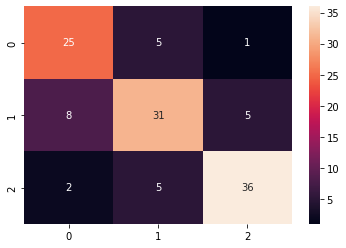

In [29]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test,pred_y)
print(confusion)
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred_y)
f = sns.heatmap(cm, annot=True, fmt='d')

In [30]:
# Specificity
# code it based on the confusion matrix

# Class - 1
sp1 = (cm[1,1]+cm[2,2])/(cm[1,0]+cm[2,0]+cm[1,1]+cm[2,2])
# Class - 2
sp2 = (cm[0,0]+cm[2,2])/(cm[0,1]+cm[2,1]+cm[0,0]+cm[2,2])
# Class - 3
sp3 = (cm[0,0]+cm[1,1])/(cm[0,2]+cm[1,2]+cm[0,0]+cm[1,1])

print(sp1, sp2, sp3)

0.8701298701298701 0.8591549295774648 0.9032258064516129
